In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

#Load job market

In [2]:
data = pd.read_csv("job-market(3).csv")

In [3]:
# data = data.dropna()

In [4]:
job_number = data['Location'].value_counts().sort_values(ascending=False)
job_number

Sydney                                  2784
Melbourne                               2481
Brisbane                                1119
Perth                                    677
Adelaide                                 390
                                        ... 
Fleurieu Peninsula & Kangaroo Island       6
Tumut, Snowy & Monaro                      4
Somerset & Lockyer                         4
Central & South East TAS                   3
Coober Pedy & Outback SA                   1
Name: Location, Length: 65, dtype: int64

In [5]:
colors = [('#%06X' % random.randint(0, 0xFFFFFF)) for i in range(len(job_number))]


Text(0.5, 0, 'Job Number')

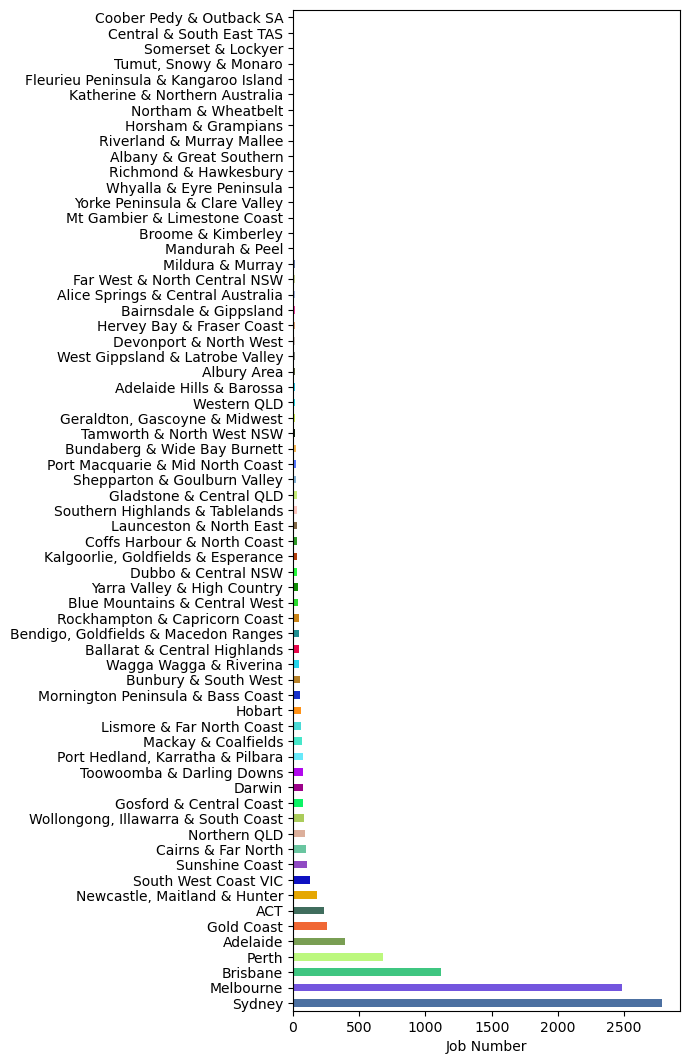

In [6]:
%matplotlib inline
ax = job_number.plot(kind="barh",figsize=(5,13),color=colors)
ax.set_xlabel('Job Number')

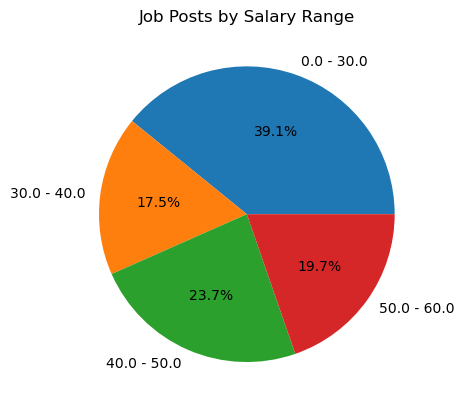

In [7]:
import matplotlib
data = data.dropna()
#salary ranges plot
#create dataframe for salary ranges
#get salary range
data['salary_range'] = data.apply(lambda row: str(row['LowestSalary']) + ' - ' + str(row['HighestSalary']), axis=1)
#salaryRange = data['LowestSalary'] + data['HighestSalary']
#salaryRange
pieGrouped = data.groupby('salary_range')['Id'].count()
pieGrouped
fig, ax = plt.subplots()
ax.pie(pieGrouped.values, labels=pieGrouped.index, autopct='%1.1f%%')
ax.set_title('Job Posts by Salary Range')
plt.show()


In [8]:
#OPTIONAL

locationDf = data[data['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf.head()

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,salary_range,Location,Count
Location,,,,,,,,,,,,,,,
Brisbane,900,900,900,900,900,900,900,900,900,900,900,900,900,Brisbane,900
Melbourne,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,Melbourne,2094
Perth,522,522,522,522,522,522,522,522,522,522,522,522,522,Perth,522
Sydney,2382,2382,2382,2382,2382,2382,2382,2382,2382,2382,2382,2382,2382,Sydney,2382


Location
ACT                                    238
Adelaide                               390
Adelaide Hills & Barossa                19
Albany & Great Southern                 10
Albury Area                             19
                                      ... 
Western QLD                             19
Whyalla & Eyre Peninsula                10
Wollongong, Illawarra & South Coast     87
Yarra Valley & High Country             36
Yorke Peninsula & Clare Valley          11
Name: Title, Length: 65, dtype: int64


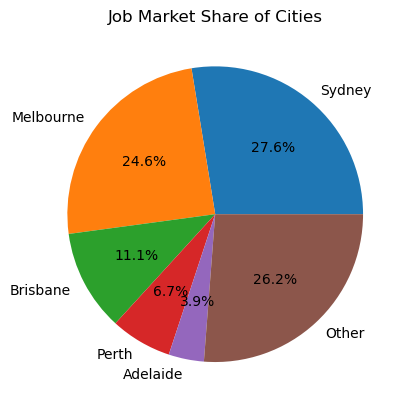

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from a CSV file
data = pd.read_csv('job-market(3).csv')

# Group the data by city and count the number of jobs for each city
job_counts = data.groupby('Location')['Title'].count()
print(job_counts)
# Sort the job counts in descending order
job_counts = job_counts.sort_values(ascending=False)

# Determine the top 5 cities and combine all other cities into a single category called 'Other'
top_5 = job_counts[:5]
other = pd.Series(job_counts[5:].sum(), index=['Other'])
job_counts = pd.concat([top_5, other])

# Plot the pie chart
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%')
plt.title('Job Market Share of Cities')
plt.show()

